# Understanding the Results

In [1]:
import pandas as pd

In [7]:
file='results/df_results_small.csv'
df = pd.read_csv(file)
df.dropna(inplace=True)
df.columns

Index(['model_type', 'clf', 'parameters', 'outcome', 'traintestset',
       'train_set_size', 'validation_set_size', 'features', 'baseline',
       'precision_at_1', 'recall_at_1', 'f1_at_1', 'precision_at_2',
       'recall_at_2', 'f1_at_2', 'precision_at_5', 'recall_at_5', 'f1_at_5',
       'precision_at_10', 'recall_at_10', 'f1_at_10', 'precision_at_20',
       'recall_at_20', 'f1_at_20', 'precision_at_30', 'recall_at_30',
       'f1_at_30', 'auc'],
      dtype='object')

In [9]:
df.head()

,model_type,clf,parameters,outcome,traintestset,train_set_size,validation_set_size,features,baseline,precision_at_1,...,precision_at_10,recall_at_10,f1_at_10,precision_at_20,recall_at_20,f1_at_20,precision_at_30,recall_at_30,f1_at_30,auc
0,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",notfullyfundedin60days,Jul-12,21423,32676,"['school_state', 'school_metro', 'school_chart...",0.256763,0.358896,...,0.359657,0.140048,0.201596,0.357613,0.278546,0.313166,0.332075,0.387962,0.357850,0.593586
1,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",notfullyfundedin60days,Jul-12,21423,32676,"['school_state', 'school_metro', 'school_chart...",0.256763,0.361963,...,0.356596,0.138856,0.199880,0.345218,0.268892,0.302312,0.337992,0.394875,0.364226,0.597295
2,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",notfullyfundedin60days,Jul-12,21423,32676,"['school_state', 'school_metro', 'school_chart...",0.256763,0.386503,...,0.354454,0.138021,0.198679,0.348278,0.271275,0.304992,0.338502,0.395471,0.364776,0.599686
3,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",notfullyfundedin60days,Jul-12,21423,32676,"['school_state', 'school_metro', 'school_chart...",0.256763,0.358896,...,0.359657,0.140048,0.201596,0.357613,0.278546,0.313166,0.332075,0.387962,0.357850,0.593586
4,RF,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",notfullyfundedin60days,Jul-12,21423,32676,"['school_state', 'school_metro', 'school_chart...",0.256763,0.361963,...,0.356596,0.138856,0.199880,0.345218,0.268892,0.302312,0.337992,0.394875,0.364226,0.597295


In [12]:
trainset1 = df[df['traintestset']=='Jul-12']
print(len(trainset1)) # 323 models

trainset2 = df[df['traintestset']=='Jan-13']
print(len(trainset2)) # 323 models

trainset3 = df[df['traintestset']=='Jul-13']
print(len(trainset3)) # 323 models

323
323
323


In [13]:
# Baseline is about 25-30%
print(trainset1['baseline'][0])
print(trainset2['baseline'][323])
print(trainset3['baseline'][646])

0.256763374
0.31494093100000004
0.284834383


In [14]:
import pipeline
import pandas as pd

# Get best models for each metrics
time_col= 'traintestset'
labels = ["jul12", "jan13", "jul13"]
#metrics = ['precision_at_1','precision_at_2','precision_at_5','precision_at_10','precision_at_20','precision_at_30',
#           'precision_at_50',' recall_at_1','recall_at_2','recall_at_5','recall_at_10','recall_at_20','recall_at_30','recall_at_50','auc-roc']
metrics = ['precision_at_1','precision_at_2','precision_at_5','precision_at_10','precision_at_20','precision_at_30',
           'recall_at_1','recall_at_2','recall_at_5','recall_at_10','recall_at_20','recall_at_30','auc']

cols = ['model_type', 'parameters'] + metrics + [time_col]


best = pd.DataFrame(columns= cols + ['metric'])

for m in metrics:
    all_best = pipeline.get_best_models(df, time_col, labels, cols, m)
    all_best['metric'] = m
    best = best.append(all_best)

For train-test set jul12, highest precision_at_1 attained is nan
For train-test set jan13, highest precision_at_1 attained is nan
For train-test set jul13, highest precision_at_1 attained is nan
For train-test set jul12, highest precision_at_2 attained is nan
For train-test set jan13, highest precision_at_2 attained is nan
For train-test set jul13, highest precision_at_2 attained is nan
For train-test set jul12, highest precision_at_5 attained is nan
For train-test set jan13, highest precision_at_5 attained is nan
For train-test set jul13, highest precision_at_5 attained is nan
For train-test set jul12, highest precision_at_10 attained is nan
For train-test set jan13, highest precision_at_10 attained is nan
For train-test set jul13, highest precision_at_10 attained is nan
For train-test set jul12, highest precision_at_20 attained is nan
For train-test set jan13, highest precision_at_20 attained is nan
For train-test set jul13, highest precision_at_20 attained is nan
For train-test set 

In [15]:
best.to_csv('best.csv')

## Best Precision and Recall at 5%


In [16]:
# Evaluate models at 5%

cols = ['model_type', 'parameters', 'traintestset','precision_at_5','recall_at_5']

model1_p = pipeline.sort_models(trainset1, 'precision_at_5', 10, cols)
model2_p = pipeline.sort_models(trainset2, 'precision_at_5', 10, cols)
model3_p = pipeline.sort_models(trainset3, 'precision_at_5', 10, cols)
model1_r = pipeline.sort_models(trainset1, 'recall_at_5', 10, cols)
model2_r = pipeline.sort_models(trainset2, 'recall_at_5', 10, cols)
model3_r = pipeline.sort_models(trainset3, 'recall_at_5', 10, cols)

In [17]:
model1_p

,model_type,parameters,traintestset,precision_at_5,recall_at_5
306,LR,"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",Jul-12,0.388242,0.075566
311,SVM,"{'C': 0.01, 'random_state': 0}",Jul-12,0.387018,0.075328
308,LR,"{'C': 1, 'penalty': 'l2', 'random_state': 0}",Jul-12,0.385181,0.074970
307,LR,"{'C': 1, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.383956,0.074732
7,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
309,LR,"{'C': 10, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.383344,0.074613
1,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
4,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
305,LR,"{'C': 0.1, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.382731,0.074493
101,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",Jul-12,0.382731,0.074493


In [18]:
model2_p

,model_type,parameters,traintestset,precision_at_5,recall_at_5
631,LR,"{'C': 1, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.507878,0.080612
629,LR,"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.506951,0.080465
633,LR,"{'C': 10, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.506024,0.080318
632,LR,"{'C': 10, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.504171,0.080024
637,SVM,"{'C': 10, 'random_state': 0}",Jan-13,0.504171,0.080024
630,LR,"{'C': 1, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.503244,0.079876
636,SVM,"{'C': 1, 'random_state': 0}",Jan-13,0.503244,0.079876
635,SVM,"{'C': 0.1, 'random_state': 0}",Jan-13,0.502317,0.079729
634,SVM,"{'C': 0.01, 'random_state': 0}",Jan-13,0.502317,0.079729
628,LR,"{'C': 0.1, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.498610,0.079141


In [19]:
model3_p

,model_type,parameters,traintestset,precision_at_5,recall_at_5
833,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.474213,0.083213
834,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.473756,0.083133
714,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",Jul-13,0.472387,0.082893
717,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",Jul-13,0.472387,0.082893
843,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.471018,0.082653
765,ET,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",Jul-13,0.469649,0.082412
687,RF,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",Jul-13,0.469192,0.082332
858,ET,"{'criterion': 'entropy', 'max_depth': 20, 'max...",Jul-13,0.469192,0.082332
837,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.469192,0.082332
789,ET,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",Jul-13,0.468279,0.082172


In [20]:
model1_r

,model_type,parameters,traintestset,precision_at_5,recall_at_5
306,LR,"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",Jul-12,0.388242,0.075566
311,SVM,"{'C': 0.01, 'random_state': 0}",Jul-12,0.387018,0.075328
308,LR,"{'C': 1, 'penalty': 'l2', 'random_state': 0}",Jul-12,0.385181,0.074970
307,LR,"{'C': 1, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.383956,0.074732
7,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
309,LR,"{'C': 10, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.383344,0.074613
1,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
4,RF,"{'max_depth': 1, 'max_features': 'sqrt', 'min_...",Jul-12,0.383344,0.074613
305,LR,"{'C': 0.1, 'penalty': 'l1', 'random_state': 0}",Jul-12,0.382731,0.074493
101,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",Jul-12,0.382731,0.074493


In [21]:
model2_r

,model_type,parameters,traintestset,precision_at_5,recall_at_5
631,LR,"{'C': 1, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.507878,0.080612
629,LR,"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.506951,0.080465
633,LR,"{'C': 10, 'penalty': 'l2', 'random_state': 0}",Jan-13,0.506024,0.080318
632,LR,"{'C': 10, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.504171,0.080024
637,SVM,"{'C': 10, 'random_state': 0}",Jan-13,0.504171,0.080024
630,LR,"{'C': 1, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.503244,0.079876
636,SVM,"{'C': 1, 'random_state': 0}",Jan-13,0.503244,0.079876
635,SVM,"{'C': 0.1, 'random_state': 0}",Jan-13,0.502317,0.079729
634,SVM,"{'C': 0.01, 'random_state': 0}",Jan-13,0.502317,0.079729
628,LR,"{'C': 0.1, 'penalty': 'l1', 'random_state': 0}",Jan-13,0.498610,0.079141


In [22]:
model3_r

,model_type,parameters,traintestset,precision_at_5,recall_at_5
833,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.474213,0.083213
834,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.473756,0.083133
714,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",Jul-13,0.472387,0.082893
717,RF,"{'max_depth': 20, 'max_features': 'log2', 'min...",Jul-13,0.472387,0.082893
843,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.471018,0.082653
765,ET,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",Jul-13,0.469649,0.082412
687,RF,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",Jul-13,0.469192,0.082332
858,ET,"{'criterion': 'entropy', 'max_depth': 20, 'max...",Jul-13,0.469192,0.082332
837,ET,"{'criterion': 'entropy', 'max_depth': 10, 'max...",Jul-13,0.469192,0.082332
789,ET,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",Jul-13,0.468279,0.082172


In [23]:
## Overall Stability Score (Average ranks)
pipeline.get_stability_score([trainset1, trainset2, trainset3], 'precision_at_5', cols)

,precision_at_5,recall_at_5,rank
parameters,,,
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.440707,0.077111,16.666667
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.439633,0.076933,18.666667
"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",0.449470,0.078520,22.666667
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.438769,0.076757,24.666667
"{'C': 0.01, 'random_state': 0}",0.447822,0.078249,25.000000
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.438108,0.076654,25.000000
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.440481,0.076999,26.333333
"{'C': 1, 'penalty': 'l2', 'random_state': 0}",0.447694,0.078184,27.666667
"{'C': 1, 'penalty': 'l1', 'random_state': 0}",0.445893,0.077886,29.000000


In [24]:
pipeline.get_stability_score([trainset1, trainset2, trainset3], 'recall_at_5', cols)

,precision_at_5,recall_at_5,rank
parameters,,,
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.440707,0.077111,16.666667
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.439633,0.076933,18.666667
"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}",0.449470,0.078520,22.666667
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.438769,0.076757,24.666667
"{'C': 0.01, 'random_state': 0}",0.447822,0.078249,25.000000
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.438108,0.076654,25.000000
"{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.440481,0.076999,26.333333
"{'C': 1, 'penalty': 'l2', 'random_state': 0}",0.447694,0.078184,27.666667
"{'C': 1, 'penalty': 'l1', 'random_state': 0}",0.445893,0.077886,29.000000


In [49]:
from matplotlib import pyplot as plt
def plot_graph(df, metric, title, name, save=False):
    df.plot.line()
    plt.title(title)
    plt.ylabel(metric)
    plt.xticks([0,1,2], ['jul12','jan12','jul13'])
    if metric.startswith('precision'):
        plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6])
    else:
        plt.yticks([0.0,0.1])
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=1)
    if save:
        plt.savefig(name)
    plt.show()


In [50]:
def get_data(df, dic, model, para, metric):
    sets = ['Jul-12','Jan-13','Jul-13']
    col = []
    for yr in sets:
        trainset = df[df['traintestset']==yr]
        temp = trainset[trainset['parameters']==para][[metric]]
        col.extend(temp[metric].values)
    dic[model + ' ' + para] = col
    return dic

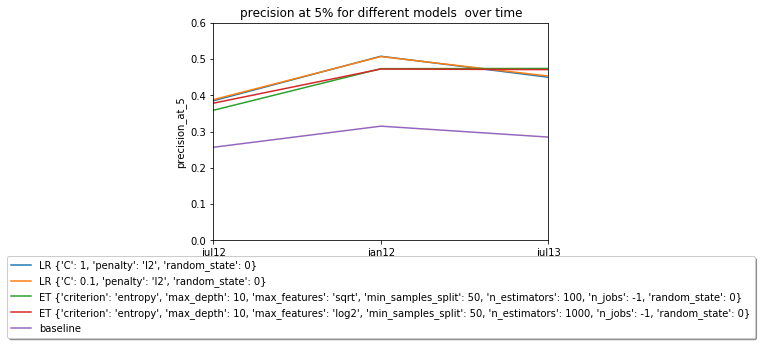

In [51]:
METRIC = 'precision_at_5'
def get_precision_graph(df):
    full_dict = {}
    # best precision overall
    full_dict = get_data(df, full_dict, 'LR',"{'C': 1, 'penalty': 'l2', 'random_state': 0}", METRIC)
    # generally good in first 2 models
    full_dict = get_data(df, full_dict, 'LR',"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}", METRIC)   
    # best recall overall
    full_dict = get_data(df, full_dict, 'ET', "{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}", METRIC)
    # best stability
    full_dict = get_data(df, full_dict, 'ET', "{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}", METRIC)
    full_dict['baseline'] = [0.2567633737299547, 0.3149409312022238, 0.2848343826991514]
    precision_df = pd.DataFrame(full_dict)
    
    plot_graph(precision_df, METRIC, 'precision at 5% for different models  over time', 'precision', save=True)

get_precision_graph(df)

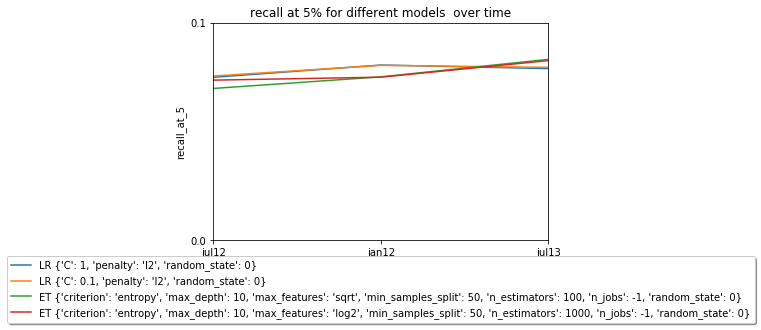

In [52]:
METRIC = 'recall_at_5'
def get_recall_graph(df):
    full_dict = {}
     # best precision overall
    full_dict = get_data(df, full_dict, 'LR',"{'C': 1, 'penalty': 'l2', 'random_state': 0}", METRIC)
    # generally good in first 2 models
    full_dict = get_data(df, full_dict, 'LR',"{'C': 0.1, 'penalty': 'l2', 'random_state': 0}", METRIC)   
    # best recall overall
    full_dict = get_data(df, full_dict, 'ET', "{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 50, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}", METRIC)
    # best stability
    full_dict = get_data(df, full_dict, 'ET', "{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}", METRIC)
    recall_df = pd.DataFrame(full_dict)
    plot_graph(recall_df, METRIC, 'recall at 5% for different models  over time', 'recall', save=True)
get_recall_graph(df)